# protostars
## 06- `star_protostars.py` experiment 6
### II. Starfish outcomes

`Starfish` with the `star_protostars_Av.py` code

Full available spectral region

In [1]:
import pandas as pd

```bash
gully at gigayear in ~/GitHub/protostars/sf/exp6/output/bb_absolute/run01 on master [+!?]
$ $protostars/code/star_protostars_Av.py --samples=5000 --incremental_save=100
keeping grid as is
Using the user defined prior in $protostars/sf/exp6/user_prior.py
2017 Apr 13, 3:44 PM: 99/5000 = 2.0%
2017 Apr 13, 3:48 PM: 199/5000 = 4.0%
[...]
2017 Apr 13, 5:59 PM: 3799/5000 = 76.0%
2017 Apr 13, 6:03 PM: 3899/5000 = 78.0%
2017 Apr 13, 6:06 PM: 3999/5000 = 80.0%
Traceback (most recent call last):
  File "/Users/gully/GitHub/protostars//code/star_protostars_Av.py", line 216, in <module>
    np.save('temp_raw_models.npy',sampler.blobs)
  File "//anaconda/envs/Starfish/lib/python3.5/site-packages/numpy/lib/npyio.py", line 491, in save
    pickle_kwargs=pickle_kwargs)
  File "//anaconda/envs/Starfish/lib/python3.5/site-packages/numpy/lib/format.py", line 573, in write_array
    pickle.dump(array, fp, protocol=2, **pickle_kwargs)
OSError: [Errno 22] Invalid argument
```

There seems to be a problem with saving the metadata blobs... Maybe the file was too big?  I saved the failed file as:  
**temp_emcee_chain_4k_failled.npy**  
in case we need it for forensics later.  The raw models file was only 4kB, so empty.

## Spectroscopy

In [2]:
import h5py

f = h5py.File("../data/reduced/S68N_NIRSPEC.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])

f.close()

In [3]:
raw_mods = np.load('../sf/exp6/output/bb_absolute/run01/temp_raw_models.npy')

In [4]:
raw_mods.shape

(3, 40)

In [5]:
raw_mods[0][3]

array([[ 0.37095695,  0.364001  ,  0.35589863, ...,  0.9719988 ,
         0.96323011,  0.9436941 ],
       [ 0.06767357,  0.06782727,  0.06798126, ...,  0.3683379 ,
         0.36882345,  0.36930919],
       [ 0.39294261,  0.3937862 ,  0.39463107, ...,  1.83419543,
         1.83650966,  1.8388256 ],
       [ 1.00809226,  1.00792855,  1.00776556, ...,  1.01026524,
         1.0102587 ,  1.01025177]])

If the first sample works, the object can be a 4D numpy array:

In [6]:
#i=4990
#star, disk, scatAv, cheb = raw_mods[i,0,0,:], raw_mods[i,0,1,:], raw_mods[i,0,2,:], raw_mods[i,0,3,:]

If the first sample fails, you get a 2D list, some of which have empty fields:

In [7]:
star, disk, scatAv, cheb = (raw_mods[0][3][i, :] for i in range(4))

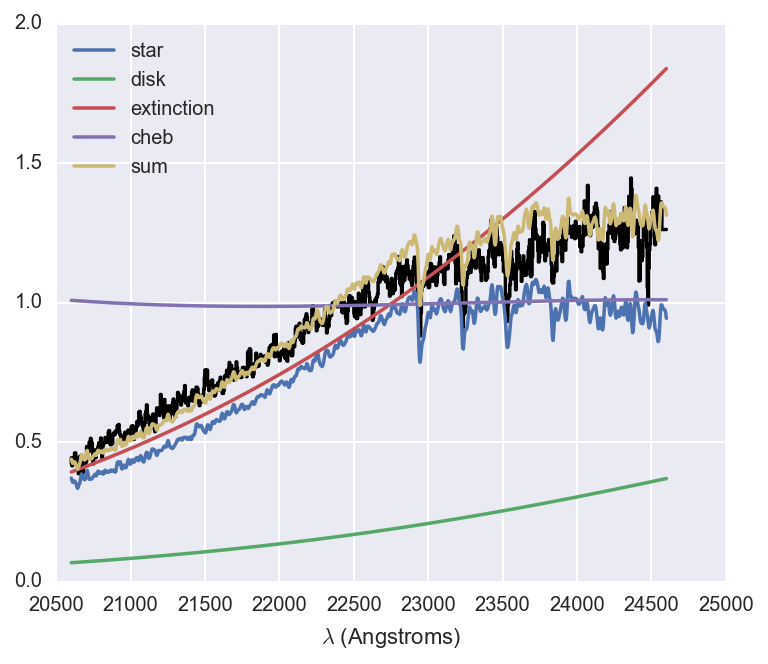

In [8]:
plt.figure(figsize=(6, 5))
plt.step(wl, fl, 'k')
plt.plot(wl, star, label = 'star')
plt.plot(wl, disk, label = 'disk')
plt.plot(wl, scatAv, label = 'extinction')
plt.plot(wl, cheb, label = 'cheb')
plt.plot(wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.legend(loc='best')

Meh